In [29]:
import random
import mne, os, glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random
from mne.datasets import somato
from mne.time_frequency import tfr_morlet
%matplotlib qt 

In [43]:
""" 
create data path
"""
# Create data paths 
sub = 4
cleaned_data_dir = '/Users/mvmigem/Documents/data/project_1/preprocessed/mastoid_ref/'
clean_epoch_path = os.path.join(cleaned_data_dir,f'main_eventset_mastoidref_{sub:02}-epo.fif')
eps = mne.read_epochs(clean_epoch_path)

Reading c:\Users\mvmigem\Documents\data\project_1\preprocessed\mastoid_ref\main_eventset_mastoidref_04-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 33 columns
4200 matching events found
No baseline correction applied
0 projection items activated


In [48]:
eps.tmax

0.5

In [ ]:
ree = eps.metadata

In [31]:
ep_list = []
ep_group1 = []
ep_group2 = []
ep_group3 = []
ep_group4 = []

for sub in range(1,22):
    if sub == 20:
        continue
    cleaned_data_dir = '/Users/mvmigem/Documents/data/project_1/preprocessed/mastoid_ref/'
    clean_epoch_path = os.path.join(cleaned_data_dir,f'main_eventset_mastoidref_{sub:02}-epo.fif')
    epochs = mne.read_epochs(clean_epoch_path)
    epochs.info['bads']=[]
    ep_list.append(epochs)

    if epochs.metadata['loc_quad'].iloc[0] == 0:
        ep_group1.append(epochs)
    elif epochs.metadata['loc_quad'].iloc[0] == 1:
        ep_group2.append(epochs)
    elif epochs.metadata['loc_quad'].iloc[0] == 2:
        ep_group3.append(epochs)
    elif epochs.metadata['loc_quad'].iloc[0] == 3:
        ep_group4.append(epochs)

eps = mne.concatenate_epochs(ep_list)

Reading c:\Users\mvmigem\Documents\data\project_1\preprocessed\mastoid_ref\main_eventset_mastoidref_01-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 33 columns
4189 matching events found
No baseline correction applied
0 projection items activated
Reading c:\Users\mvmigem\Documents\data\project_1\preprocessed\mastoid_ref\main_eventset_mastoidref_02-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 33 columns
4196 matching events found
No baseline correction applied
0 projection items activated
Reading c:\Users\mvmigem\Documents\data\project_1\preprocessed\mastoid_ref\main_eventset_mastoidref_03-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 32 columns
4188 matching events found
N

C:\Users\mvmigem\AppData\Local\Temp\ipykernel_20976\3442766598.py:25: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  eps = mne.concatenate_epochs(ep_list)


Adding metadata with 35 columns
82046 matching events found
Applying baseline correction (mode: mean)


In [32]:

sub_list = eps.metadata['participant'].unique() 

# Divide the epoch file into sections based on metadata that can't be distinguished by event names
# Drop catch trials
epochs_nocatch = eps.copy()['catch_trial == 0']
# # Divide attention conditions
# epochs_attended = epochs_nocatch['attention == "attended"']
# epochs_unattended = epochs_nocatch['attention == "unattended"']
# # Divide by staring position
# epochs_start3 = epochs_nocatch['start_position == 2']
# epochs_start1 = epochs_nocatch['start_position == 0']
# epochs_start2 = epochs_nocatch['start_position == 1']
# epochs_start4 = epochs_nocatch['start_position == 3']
# # Divide unattended trials by start pos
# epochs_unattended_start3 = epochs_unattended['start_position == 2']
# epochs_unattended_start1 = epochs_unattended['start_position == 0']
# epochs_unattended_start2 = epochs_unattended['start_position == 1']
# epochs_unattended_start4 = epochs_unattended['start_position == 3']
# # Divide attented trials by start pos
# epochs_attended_start3 = epochs_attended['start_position == 2']
# epochs_attended_start1 = epochs_attended['start_position == 0']
# epochs_attended_start2 = epochs_attended['start_position == 1']
# epochs_attended_start4 = epochs_attended['start_position == 3']
# # Extra devision for the odd boys
# epochs_attended_reg = epochs_attended['expected =="regular"']
# epochs_attended_odd = epochs_attended['expected == "odd"']
# epochs_unattended_reg = epochs_unattended['expected =="regular"']
# epochs_unattended_odd = epochs_unattended['expected == "odd"']

In [6]:
big_meta = eps.metadata

### Evoked plotting

In [ ]:
"""
Main pos individual channels
"""
evoked_pos1 = epochs_nocatch['pos1'].average()
evoked_pos2 = epochs_nocatch['pos2'].average()
evoked_pos3 = epochs_nocatch['pos3'].average()
evoked_pos4 = epochs_nocatch['pos4'].average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('pos1','pos2','pos3','pos4')
# conds = ('seq1','seq2','seq3','seq4')

norm = dict(zip(conds, evokeds_list))

In [ ]:
# Event selection for prediction effects

# Remove catch
epochs_nocatch = eps.copy()['catch_trial == 0']['pos4']
# Select second stim of trial
epochs_stim2 = epochs_nocatch['seq2']
# Regular vs odd
epochs_odd = epochs_stim2['expected == "odd"']
epochs_reg = epochs_stim2['expected == "regular"']['precedes_odd == 1']
# Attention
ep_odd_att = epochs_odd['attention == "attended"']
ep_odd_unatt = epochs_odd['attention == "unattended"']
ep_reg_att = epochs_reg['attention == "attended"']
ep_reg_unatt = epochs_reg['attention == "unattended"']


In [8]:
"""
prediction v attention per pp
"""

group_1 = []
group_3 = []
group_4 = []
group_1_pp = []
group_3_pp = []
group_4_pp = []

for sub in range(1,18):

    evoked_pos1 = ep_reg_att[f'participant == {sub}'].average()
    evoked_pos2 = ep_odd_att[f'participant == {sub}'].average()
    evoked_pos3 = ep_reg_unatt[f'participant == {sub}'].average()
    evoked_pos4 = ep_odd_unatt[f'participant == {sub}'].average()

    evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
    conds = ('att reg','att odd','unatt reg','unatt odd')
    norm = dict(zip(conds, evokeds_list))
    if all(epochs_nocatch[f'participant == {sub}'].metadata["loc_quad"]==0):
        group_1.append(norm)
        group_1_pp.append(sub)
    elif all(epochs_nocatch[f'participant == {sub}'].metadata["loc_quad"]==2):
        group_3.append(norm)
        group_3_pp.append(sub)
    elif all(epochs_nocatch[f'participant == {sub}'].metadata["loc_quad"]==3):
        group_4.append(norm)
        group_4_pp.append(sub)



NameError: name 'ep_reg_att' is not defined

In [ ]:
all(ep_reg_att[f'participant == {4}'].metadata["loc_quad"]==3)

In [ ]:
"""
attention effect 1 in sequence
"""
seq1_attcond_evokeds = np.empty((7,4,2,3),dtype='object') # [sub,pos,att,group]


for i, ep in enumerate(ep_group1):

    seq1_attcond_evokeds[i,1,0,0] = ep['pos2/seq1']["attention == 'attended'"].average()
    seq1_attcond_evokeds[i,3,0,0] = ep['pos4/seq1']["attention == 'attended'"].average()

    seq1_attcond_evokeds[i,1,1,0] = ep['pos2/seq1']["attention == 'unattended'"].average()
    seq1_attcond_evokeds[i,3,1,0] = ep['pos4/seq1']["attention == 'unattended'"].average()

for i ,ep in enumerate(ep_group3):

    seq1_attcond_evokeds[i,1,0,1] = ep['pos2/seq1']["attention == 'attended'"].average()
    seq1_attcond_evokeds[i,3,0,1] = ep['pos4/seq1']["attention == 'attended'"].average()

    seq1_attcond_evokeds[i,1,1,1] = ep['pos2/seq1']["attention == 'unattended'"].average()
    seq1_attcond_evokeds[i,3,1,1] = ep['pos4/seq1']["attention == 'unattended'"].average()

for i,ep in enumerate(ep_group4):

    seq1_attcond_evokeds[i,0,0,2] = ep['pos1/seq']["attention == 'attended'"].average()
    seq1_attcond_evokeds[i,2,0,2] = ep['pos3/seq1']["attention == 'attended'"].average()

    seq1_attcond_evokeds[i,0,1,2] = ep['pos1/seq']["attention == 'unattended'"].average()
    seq1_attcond_evokeds[i,2,1,2] = ep['pos3/seq1']["attention == 'unattended'"].average()


In [ ]:

group1_pos2_att = mne.grand_average(list(seq1_attcond_evokeds[:5,1,0,0]))
group1_pos2_unatt = mne.grand_average(list(seq1_attcond_evokeds[:5,1,1,0]))
group1_pos4_att = mne.grand_average(list(seq1_attcond_evokeds[:5,3,0,0]))
group1_pos4_unatt = mne.grand_average(list(seq1_attcond_evokeds[:5,3,1,0]))

group3_pos2_att = mne.grand_average(list(seq1_attcond_evokeds[:,1,0,1]))
group3_pos2_unatt = mne.grand_average(list(seq1_attcond_evokeds[:,1,1,1]))
group3_pos4_att = mne.grand_average(list(seq1_attcond_evokeds[:,3,0,1]))
group3_pos4_unatt = mne.grand_average(list(seq1_attcond_evokeds[:,3,1,1]))

group4_pos1_att = mne.grand_average(list(seq1_attcond_evokeds[:,0,0,2]))
group4_pos3_att = mne.grand_average(list(seq1_attcond_evokeds[:,2,0,2]))
group4_pos1_unatt = mne.grand_average(list(seq1_attcond_evokeds[:,0,1,2]))
group4_pos3_unatt = mne.grand_average(list(seq1_attcond_evokeds[:,2,1,2]))

evokeds_list1 = [group1_pos2_att,group1_pos2_unatt,group1_pos4_att,group1_pos4_unatt]
evokeds_list3 = [group3_pos2_att,group3_pos2_unatt,group3_pos4_att,group3_pos4_unatt]
evokeds_list4 = [group4_pos1_att,group4_pos1_unatt,group4_pos3_att,group4_pos3_unatt]
conds1 = ('att 2','unatt 2','att 4','unatt 4')
conds3 = ('att 2','unatt 2','att 4','unatt 4')
conds4 = ('att 1','unatt 1','att 3','unatt 3')
norm1 = dict(zip(conds1, evokeds_list1))
norm3 = dict(zip(conds3, evokeds_list3))
norm4 = dict(zip(conds4, evokeds_list4))


In [33]:
"""
checking prediction manipulation on p3, means agragating across positions 
"""
att_reg_ev = []
att_odd_ev = []
unatt_reg_ev = []
unatt_odd_ev = []


for i, sub in enumerate(sub_list):
    
    att_reg_ev.append(
        epochs_nocatch['seq2'][f"participant == {sub}"]["attention == 'attended'"]['expected == "regular"']['precedes_odd == 1'].average())
    att_odd_ev.append(
        epochs_nocatch['seq2'][f"participant == {sub}"]["attention == 'attended'"]['expected == "odd"'].average())
    unatt_reg_ev.append(
        epochs_nocatch['seq2'][f"participant == {sub}"]["attention == 'unattended'"]['expected == "regular"']['precedes_odd == 1'].average())
    unatt_odd_ev.append(
        epochs_nocatch['seq2'][f"participant == {sub}"]["attention == 'unattended'"]['expected == "odd"'].average())
    

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

In [34]:

evoked_pred = [mne.grand_average(att_reg_ev),
               mne.grand_average(att_odd_ev),
               mne.grand_average(unatt_reg_ev),
               mne.grand_average(unatt_odd_ev),]

conditions = ('attended regular','attended odd','unattended regular','unattended odd')

norm = dict(zip(conditions, evoked_pred))

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


In [ ]:

n_subjects =len(group_4)
n_cols = 3
n_rows = (n_subjects + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over subjects and plot each on a subplot
for ax, sub in zip(axes, range(n_subjects)):

    evo_set1 = group_4[sub]
    mne.viz.plot_compare_evokeds(evo_set1, 
                                picks= 'POz', 
                                vlines=[0.05,0.1],
                                ylim=dict(eeg=[-10, 10]),
                                show=True,
                                axes = ax,
                                title= f'sub {group_4_pp[sub]}')
    # mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Pz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]), title= f'sub {sub}')
plt.tight_layout
plt.show

In [ ]:
subject = evo_set1['att reg'].metadata['participant'].unique()[0] 

In [17]:
epoch_set1 = norm
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'P1', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'P2', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Pz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))

[<Figure size 800x600 with 2 Axes>]

In [13]:
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'C1', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'C2', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Cz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))

mne.viz.plot_compare_evokeds(epoch_set1, picks= 'P1', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'P2', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Pz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))

mne.viz.plot_compare_evokeds(epoch_set1, picks= 'PO3', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'PO4', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'POz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))

mne.viz.plot_compare_evokeds(epoch_set1, picks= 'O1', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'O2', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Oz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))

[<Figure size 800x600 with 2 Axes>]

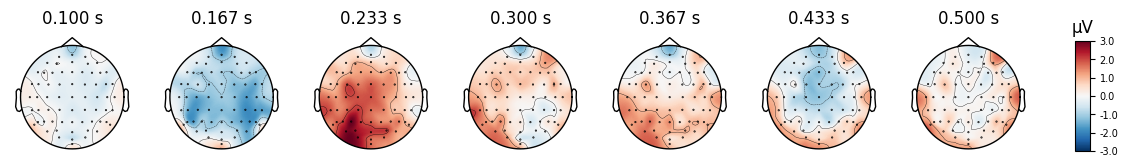

In [42]:
"""

"""
times = np.linspace(0.1, 0.5, 7)
vlim=(-3, 3)

# evoked_pred[0].plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
# evoked_pred[1].plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
# evoked_pred[2].plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
evoked_pred[3].plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)

In [ ]:
times = np.linspace(0.05, 0.11, 5)
group4_pos1_unatt.plot_topomap(ch_type="eeg", times=times, colorbar=True)
group4_pos3_att.plot_topomap(ch_type="eeg", times=times, colorbar=True)
group4_pos1_unatt.plot_topomap(ch_type="eeg", times=times, colorbar=True)
group4_pos3_att.plot_topomap(ch_type="eeg", times=times, colorbar=True)

### Time course of c1 peaks and means

In [ ]:
""" 
Time course first sequence position
"""
# attended
ep_df_att_1 = ep_att_1.metadata
ep_df_att_1['poz_c1_mean'] = ep_att_1.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)
ep_df_att_2 = ep_att_2.metadata
ep_df_att_2['poz_c1_mean'] = ep_att_2.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)
ep_df_att_3 = ep_att_3.metadata
ep_df_att_3['poz_c1_mean'] = ep_att_3.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)
ep_df_att_4 = ep_att_4.metadata
ep_df_att_4['poz_c1_mean'] = ep_att_4.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)
# unattend
ep_df_unatt_1= ep_unatt_1.metadata
ep_df_unatt_1['poz_c1_mean'] = ep_unatt_1.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)
ep_df_unatt_2 = ep_unatt_2.metadata
ep_df_unatt_2['poz_c1_mean'] = ep_unatt_2.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)
ep_df_unatt_3 = ep_unatt_3.metadata
ep_df_unatt_3['poz_c1_mean'] = ep_unatt_3.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)
ep_df_unatt_4 = ep_unatt_4.metadata
ep_df_unatt_4['poz_c1_mean'] = ep_unatt_4.crop(tmin=.07, tmax=.1).get_data(picks='POz').mean(axis=2)


In [ ]:
""" 
Time course
"""
position = ['pos1','pos2','pos3','pos4']
condition = 'attention == "attended" & expected == "regular" & start_position == 2'
pos1_win_data = c1_window_epochs[condition][position[0]].get_data(picks='POz')
pos2_win_data = c1_window_epochs[condition][position[1]].get_data(picks='POz')
pos3_win_data = c1_window_epochs[condition][position[2]].get_data(picks='POz')
pos4_win_data = c1_window_epochs[condition][position[3]].get_data(picks='POz')

In [ ]:
mean_c1_1 = pos1_win_data.mean(axis=2).squeeze()
mean_c1_2 = pos2_win_data.mean(axis=2).squeeze()
mean_c1_3 = pos3_win_data.mean(axis=2).squeeze()
mean_c1_4 = pos4_win_data.mean(axis=2).squeeze()

max_c1_1 = pos1_win_data.max(axis=2).squeeze()
max_c1_2 = pos2_win_data.max(axis=2).squeeze()
max_c1_3 = pos3_win_data.max(axis=2).squeeze()
max_c1_4 = pos4_win_data.max(axis=2).squeeze()

mean_c1_list = [mean_c1_1,mean_c1_2,mean_c1_3,mean_c1_4]
max_c1_list = [max_c1_1,max_c1_2,max_c1_3,max_c1_4]

In [ ]:
"""
Plotting mean c1 voltage time wise
"""
plt.rcParams["figure.figsize"] = [18,10]
fig, axs = plt.subplots(4,2, sharey=True)

sns.regplot(data = ep_df_att_1, x = 'trial', y = 'poz_c1_mean', ax = axs[0,0],scatter_kws={'s': 10, 'color': 'red'})
sns.regplot(data = ep_df_unatt_1, x = 'trial', y = 'poz_c1_mean', ax = axs[1,0],scatter_kws={'s': 10, 'color': 'green'})
sns.regplot(data = ep_df_att_2, x = 'trial', y = 'poz_c1_mean', ax = axs[0,1],scatter_kws={'s': 10, 'color': 'red'})
sns.regplot(data = ep_df_unatt_2, x = 'trial', y = 'poz_c1_mean', ax = axs[1,1],scatter_kws={'s': 10, 'color': 'green'})
sns.regplot(data = ep_df_att_3, x = 'trial', y = 'poz_c1_mean', ax = axs[2,1],scatter_kws={'s': 10, 'color': 'red'})
sns.regplot(data = ep_df_unatt_3, x = 'trial', y = 'poz_c1_mean', ax = axs[3,1],scatter_kws={'s': 10, 'color': 'green'})
sns.regplot(data = ep_df_att_4, x = 'trial', y = 'poz_c1_mean', ax = axs[2,0],scatter_kws={'s': 10, 'color': 'red'})
sns.regplot(data = ep_df_unatt_4, x = 'trial', y = 'poz_c1_mean', ax = axs[3,0],scatter_kws={'s': 10, 'color': 'green'})
plt.tight_layout()
plt.show()
# sns.regplot(x = np.arange(len(mean_c1_list[1])), y = mean_c1_list[1], ax=axs[0,1])
# sns.regplot(x = np.arange(len(mean_c1_list[2])), y = mean_c1_list[2], ax=axs[1,1])
# sns.regplot(x = np.arange(len(mean_c1_list[3])), y = mean_c1_list[3], ax=axs[1,0])



In [ ]:
"""
Plotting max c1 voltage time wise
"""
plt.rcParams["figure.figsize"] = [18,10]
fig, axs = plt.subplots(2,2, sharey=True)

sns.regplot(x = np.arange(len(max_c1_list[0])), y = max_c1_list[0], ax=axs[0,0])
sns.regplot(x = np.arange(len(max_c1_list[1])), y = max_c1_list[1], ax=axs[0,1])
sns.regplot(x = np.arange(len(max_c1_list[2])), y = max_c1_list[2], ax=axs[1,1])
sns.regplot(x = np.arange(len(max_c1_list[3])), y = max_c1_list[3], ax=axs[1,0])

plt.suptitle('max values '+ condition)
plt.tight_layout()
plt.show()

### Time frequency exploration

In [ ]:
spec_first_att = epochs_attended['pos4/seq2'].average().compute_psd()
spec_last_att = epochs_attended['seq3'].average().compute_psd()
spec_first_unatt = epochs_unattended['seq1'].average().compute_psd()
spec_last_unatt = epochs_unattended['seq3'].average().compute_psd()

In [ ]:
spec_first_att.plot_topomap(ch_type="eeg")
spec_first_unatt.plot_topomap(ch_type="eeg")

In [ ]:
freqs = np.logspace(*np.log10([8, 13]), num=8)
n_cycles = freqs / 3.0  # different number of cycle per frequency
power, itc = tfr_morlet(
    epochs_attended['pos4/seq2'],
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    n_jobs=None,
)

In [ ]:

power.plot([27], baseline=(-0.09, 0), mode="logratio", title=power.ch_names[27])

fig, axes = plt.subplots(1, 2, figsize=(7, 4), layout="constrained")
topomap_kw = dict(
    ch_type="eeg", tmin=0.09, tmax=0.5, baseline=(-0.09, 0), mode="logratio", show=False
)
plot_dict = dict(Alpha=dict(fmin=8, fmax=13))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)